# IMDb

Date: 2023/08/16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
'data: {}, label: {}'.format(train_data[0], train_labels[0])

'data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32], label: 1'

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
reverse_word_index.get(1234)

'involving'

In [8]:
reverse_word_index.get(111111, '?')

'?'

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
np.zeros((3, 8))

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train[0:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [16]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

## Neural Network

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5098 - accuracy: 0.7915 - val_loss: 0.4097 - val_accuracy: 0.8355
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3206 - accuracy: 0.8905 - val_loss: 0.3196 - val_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2396 - accuracy: 0.9203 - val_loss: 0.2886 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1940 - accuracy: 0.9345 - val_loss: 0.2828 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1627 - accuracy: 0.9467 - val_loss: 0.2791 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1391 - accuracy: 0.9555 - val_loss: 0.2963 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1193 - accuracy: 0.9629 - val_loss: 0.3088 - val_accuracy: 0.8830
Epoch 8/20
30

## Results -- overfitting

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Text(0, 0.5, 'Loss')

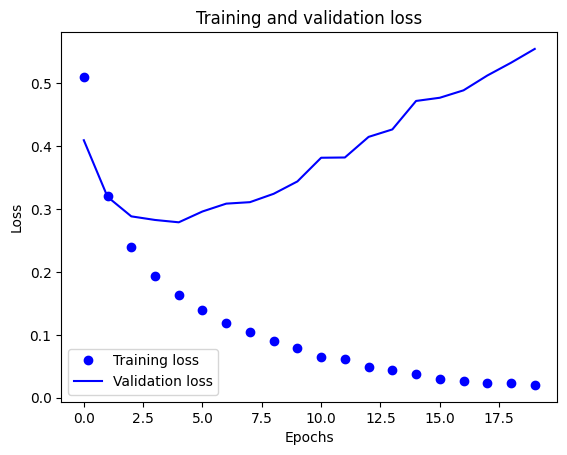

In [23]:
fig, ax = plt.subplots()
ax.plot(loss_values, 'bo', label='Training loss')
ax.plot(val_loss_values, 'b', label='Validation loss')
ax.legend()
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [24]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

Text(0, 0.5, 'Accuracy')

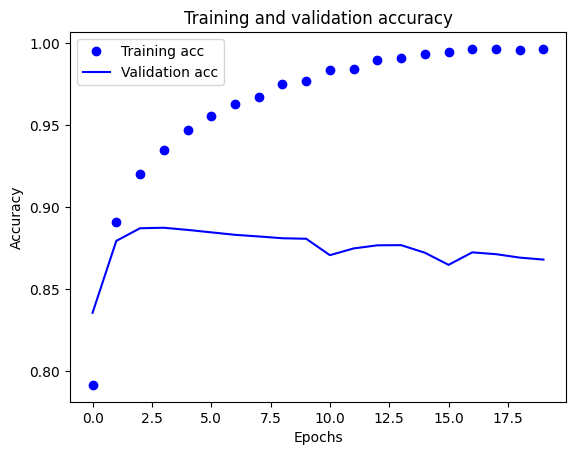

In [25]:
fig, ax = plt.subplots()
ax.plot(acc, 'bo', label='Training acc')
ax.plot(val_acc, 'b', label='Validation acc')
ax.legend()
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

## Training 2

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,  # 20 -> 4
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 47ms/step - loss: 0.5452 - accuracy: 0.7785 - val_loss: 0.4217 - val_accuracy: 0.8641
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.3483 - accuracy: 0.8896 - val_loss: 0.3356 - val_accuracy: 0.8723
Epoch 3/4
30/30 [==============================] - 1s 20ms/step - loss: 0.2613 - accuracy: 0.9152 - val_loss: 0.3024 - val_accuracy: 0.8817
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2108 - accuracy: 0.9305 - val_loss: 0.2802 - val_accuracy: 0.8914


## Results 2

In [29]:
history_dict = history.history

In [30]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Text(0, 0.5, 'Loss')

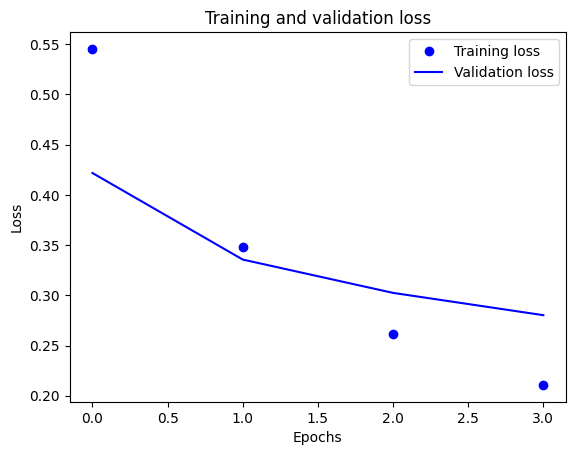

In [31]:
fig, ax = plt.subplots()
ax.plot(loss_values, 'bo', label='Training loss')
ax.plot(val_loss_values, 'b', label='Validation loss')
ax.legend()
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [32]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

Text(0, 0.5, 'Accuracy')

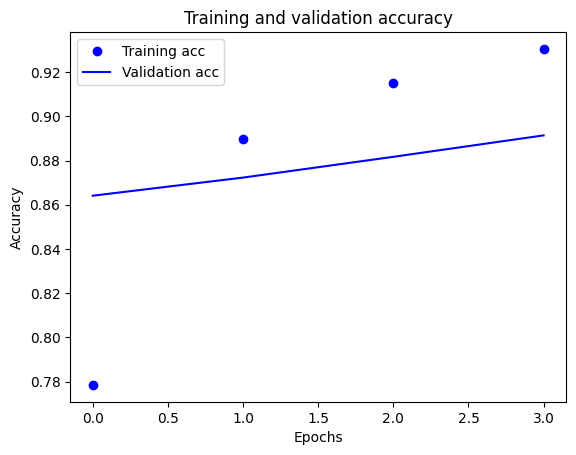

In [33]:
fig, ax = plt.subplots()
ax.plot(acc, 'bo', label='Training acc')
ax.plot(val_acc, 'b', label='Validation acc')
ax.legend()
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

## Prediction

In [34]:
prediction = model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


In [35]:
prediction

array([[0.22821489],
       [0.99894476],
       [0.8847244 ],
       ...,
       [0.11493084],
       [0.1889587 ],
       [0.5494616 ]], dtype=float32)